# Практическая работа №3: Кластерный анализ

Выполнила студентка гр. 0373 Дубова Влада. Вариант №6


## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа, в частности, метода k-means и метода поиска сгущений.

## Основные теоретические положения
*Кластеризация* − это распределение данных на группы (кластеры) по некоторому объединяющему признаку. Все объекты в кластере более похожи друг на друга, чем на объекты других кластеров.

*Нормализация признаков* − метод приведения к новому диапазону. Применяется, когда нужно избавиться от большого разброса значений признаков.

*Нормализация средним* − диапазон определяется с помощью среднего $\mu_x$ и стандартного отклонения $\sigma_x$: \begin{equation}\tilde x_i = \frac{x_i-\mu_x}{\sigma_x}.\end{equation}

*«Грубая» верхняя оценка количества кластеров* − число, после которого увеличение количества кластеров нецелесообразно $\tilde k = \lfloor \sqrt{n/2}\rfloor$

*Евклидово расстояние:* $d(x,y) = \sqrt{\sum_{i=1}^k(x_i-y_i)^2}$

*Алгоритм k-means* − алгоритм кластериизации. На каждой итерации вычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем объекты снова разбиваются на кластеры в соответствии с тем, какой из новых центров оказался ближе по Евклидовому расстоянию.

*Алгоритм k-medoids* − центроиды всегда выбираются из объектов выборки, среднее отличие которого от всех объектов в кластере минимально. Это медоид – самая центральная точка кластера.

*Метод локтя* − метод выбора числа кластеров. Строится график, где по оси абсцисс — число кластеров, а по оси ординат — разброс $W = \sum_{j=1}^kW_{C_j}$, $W_{C_j} = \sum_{x_i\in C_j}(x_i-x_{C_j})^2$, $W_{C_j}$ — разброс внутри кластера j, $x_{C_j}$ — центр кластера, $C_j$ — множество элементов. Выбрается точка на оси OX, после которой последующий разброс уменьшится с наименьшей степенью.

*Алгоритм поиска сгущений (FOREL)* − на каждом шаге случайным образом выбирается объект из выборки, вокруг него раздувается сфера радиуса R, внутри этой сферы выбирается центр тяжести − центр новой сферы. После того как центр сферы стабилизируется, все объекты внутри сферы с этим центром помечаются как кластеризованные и выкидываются из выборки. Этот процесс мы повторяется до тех пор, пока вся выборка не будет кластеризована.
R выбирается из промежутка $R_{min}\leq R\leq R_{max}.$ $R_{min}$ и $R_{max}$ получают из матрицы $D = \{ d_{ij}\}_{i\gt j}$, $d_{ij}=d(x_i,x_j)$, $R_{min}=min\{ d_{ij}\gt 0\}$ , $R_{max}=max\{ d_{ij}\}$

*Алгоритм k-means++* − «интеллектуальная» инициализация центроидов.Центроидом $C_i$ выбирается элемент $X_i$ с максимальным значением (вероятностью) \begin{equation}\frac{d(X_i)}{\sum_{j=1}^kd(X_i)^2}.\end{equation} Чем дальше расположена точка от текущих известных центров, тем выше вероятность ее выбора. 

## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств (кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

#### 1. Нормализовать множество точек из предыдущей работы, отобразить полученное множество.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
age = [8,9,9,12,14,11,11,8,14,8,10,9,9,8,11,17,11,10,9,11,14,16,12,10,11,11,12,10,8,10,11,10,13,14,9,8,8,10,10,10,10,9,10,9,13,9,10,9,16,15,9,10,11,8,15,11,11,10,11,12,10,11,14,8,13,11,15,10,10,15,8,11,10,20,8,13,9,9,12,9,7,10,18,7,10,8,9]
weight = [23.81358,20.25571775,16.11669075,27.68328675,58.04560125,29.07241225,46.13881125,24.93338525,31.00017825,30.1355185,31.638042,28.08017975,27.34309275,18.75319425,39.02308675,42.410852,47.230267,19.57532975,32.205032,43.318036,35.11085575,39.972795,44.4803655,38.08755325,31.19862475,49.0871593,38.08755325,29.993771,32.431828,43.02036625,44.94813225,41.23434775,15.37960375,36.61337925,23.926978,10.0073735,26.251637,34.23202125,21.70154225,35.33765175,24.90503575,39.179009,16.669506,15.3937785,10.886208,20.22736825,35.81959325,43.87085125,32.31843,17.70426275,23.586784,31.6096925,33.92017675,6.4353365,28.44872325,25.1460065,35.4652245,33.57998275,33.9910505,16.726205,20.00057225,72.4329725,36.81182575,19.71707725,13.8062065,12.94154675,18.6256215,38.34269875,31.62386725,18.01610725,42.127357,39.19318375,12.7856245,31.127751,24.79163775,23.48756075,41.220173,37.37881575,27.17299575,22.97726975,23.7852305,13.50853675,27.08794725,36.27318525,35.777069,5.85417175,31.2694985]
n = 87

Выборка из 87 элементов была сформирована простым бесповторным отбором из генеральной совокупности [Crab Age Prediction](https://www.kaggle.com/datasets/sidhus/crab-age-prediction "Crab Age Prediction"). Для обработки выбран возраст и вес крабов.

Нормализуем множество точек средним.

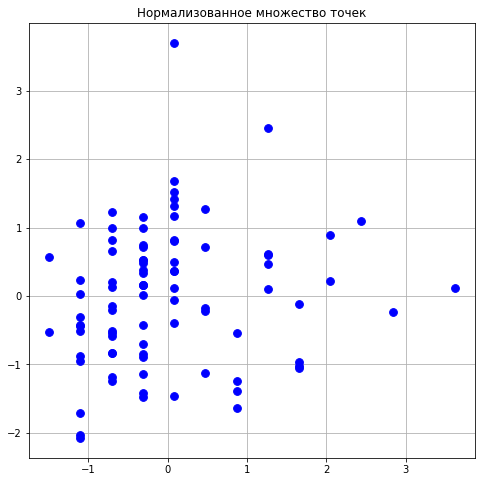

In [2]:
age = (age-np.mean(age))/(np.var(age)**0.5)
weight = (weight-np.mean(weight))/(np.var(weight)**0.5)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(age, weight, s=60, c='b')
ax.set_axisbelow(True)
ax.set_title('Нормализованное множество точек')
plt.grid(True)
plt.show()

#### 2. Определить «грубую» верхнюю оценку количества кластеров $\tilde k$.

In [3]:
k_ = int((n/2)**0.5)
print('«Грубая» верхняя оценка количества кластеров =', k_)

«Грубая» верхняя оценка количества кластеров = 6


#### 3. Реализовать алгоритм k-means. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

В качестве начальных центроидов для удобства выберем фиксированные точки.

Центроиды:
 [[ 0. -0.]] 
Объём кластеров: [87]


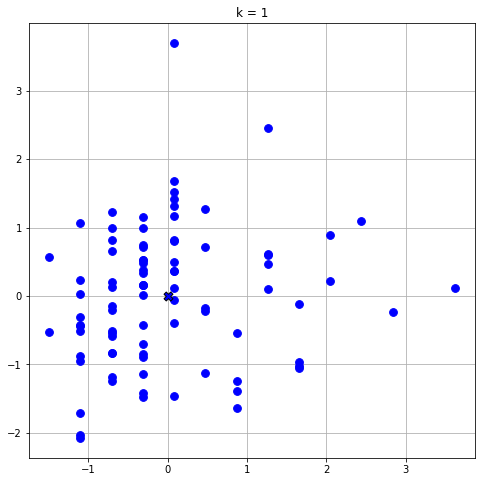

Центроиды:
 [[-0.426   0.0244]
 [ 1.633  -0.0936]] 
Объём кластеров: [69, 18]


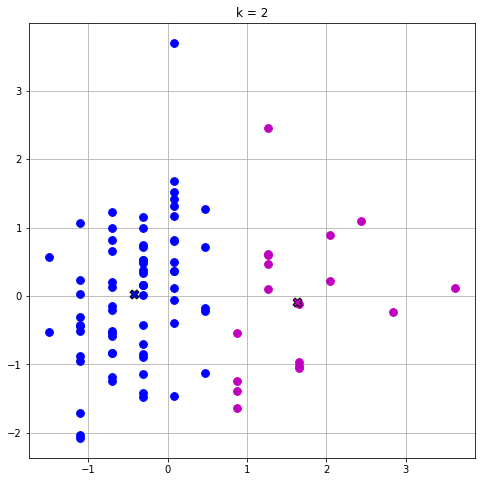

Центроиды:
 [[-0.6791 -0.8612]
 [-0.2292  0.7996]
 [ 1.5306 -0.2395]] 
Объём кластеров: [30, 38, 19]


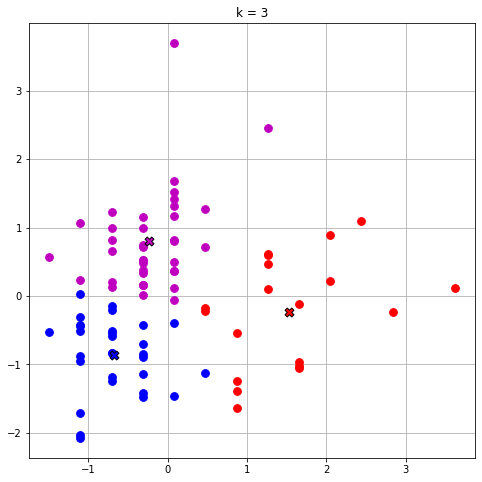

Центроиды:
 [[-0.5209 -0.9421]
 [ 0.6714  3.0792]
 [ 1.8234  0.0102]
 [-0.2615  0.6114]] 
Объём кластеров: [32, 2, 14, 39]


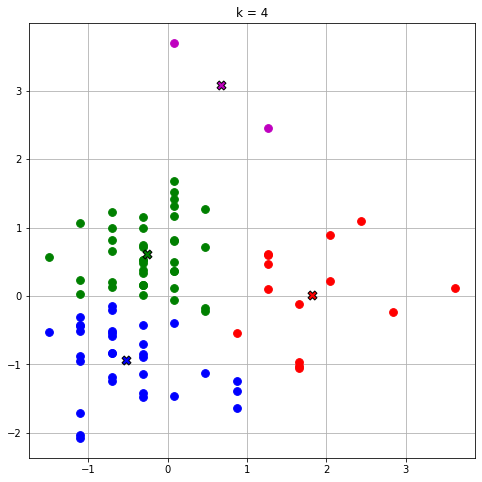

Центроиды:
 [[-0.7189 -0.8517]
 [ 0.6714  3.0792]
 [ 2.5989  0.4162]
 [ 1.1041 -0.5178]
 [-0.2792  0.673 ]] 
Объём кластеров: [29, 2, 5, 15, 36]


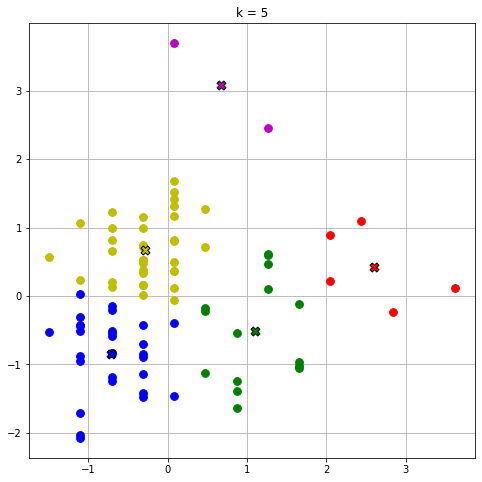

Центроиды:
 [[-0.7395 -1.0101]
 [ 0.6714  3.0792]
 [ 2.5989  0.4162]
 [ 1.0799 -0.6899]
 [ 0.1228  0.9456]
 [-0.548   0.2399]] 
Объём кластеров: [23, 2, 5, 13, 19, 25]


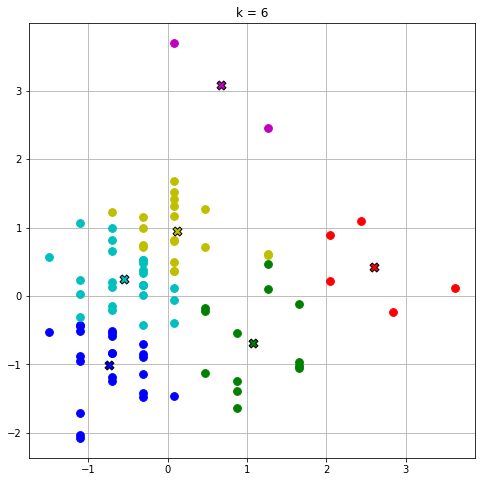

In [4]:
def k_means(x, y, k, centers):
    while True:
        clusters = [[] for i in range(k)]
        centers_prev = centers.copy()
        for j in range(len(x)):
            dist = [((x[j]-centers[i][0])**2 + (y[j]-centers[i][1])**2)**0.5 for i in range(k)]
            clusters[np.argmin(dist)].append([x[j],y[j]])
        for i in range(k):
            centers[i] = (np.mean(np.array(clusters[i])[:,0]),np.mean(np.array(clusters[i])[:,1]))
        if centers_prev == centers:
            break
    return centers, clusters
def output(centers, clusters):
    print('Центроиды:\n', np.round(centers,4), '\nОбъём кластеров:', [len(i) for i in clusters])
    colors = ['b','m','r','g','y','c','darkorange','pink','lime','blueviolet','gold','skyblue','olive','lightgreen','grey','magenta','violet','brown','peru']
    fig, ax = plt.subplots(figsize=(8, 8))
    for i in range(len(centers)):
        ax.scatter(np.array(clusters[i])[:,0], np.array(clusters[i])[:,1], s=60, c=colors[i])
        ax.scatter(centers[i][0], centers[i][1], marker='X', c=colors[i], s=80, edgecolors = 'k')
    ax.set_axisbelow(True)
    ax.set_title('k = %i'%(i+1))
    plt.grid(True)
    plt.show()
C = [[[age[24], weight[24]]],
     [[age[83], weight[83]],[age[73], weight[73]]],
     [[age[80], weight[80]],[age[61], weight[61]],[age[73], weight[73]]],
     [[age[35], weight[35]],[age[61], weight[61]],[age[73], weight[73]],[age[25], weight[25]]],
     [[age[35], weight[35]],[age[61], weight[61]],[age[73], weight[73]],[age[66], weight[66]],[age[25], weight[25]]],
     [[age[35], weight[35]],[age[61], weight[61]],[age[73], weight[73]],[age[66], weight[66]],[age[25], weight[25]],[age[83], weight[83]]]]
for k in range(1, k_+1):
    centers, clusters = k_means(age, weight, k, C[k-1])
    output(centers, clusters)

#### 4. Реализовать алгоритм k-medoids. Отобразить полученные кластеры, каждый кластер выделить разным цветом или маркером, отметить центроиды.

В качестве начальных центроидов для удобства выберем фиксированные точки.

Центроиды:
 [[-0.312   0.1579]] 
Объём кластеров: [87]


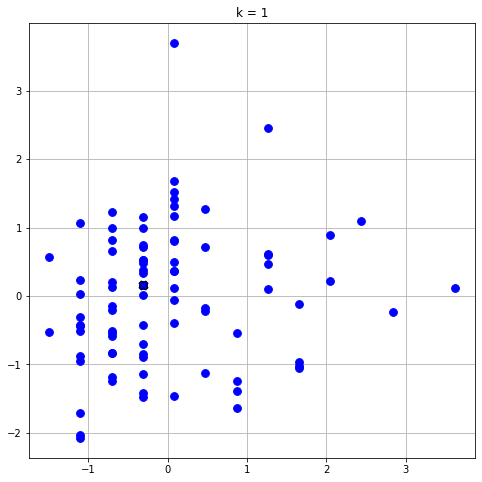

Центроиды:
 [[-0.312   0.1579]
 [ 1.6548 -0.1167]] 
Объём кластеров: [69, 18]


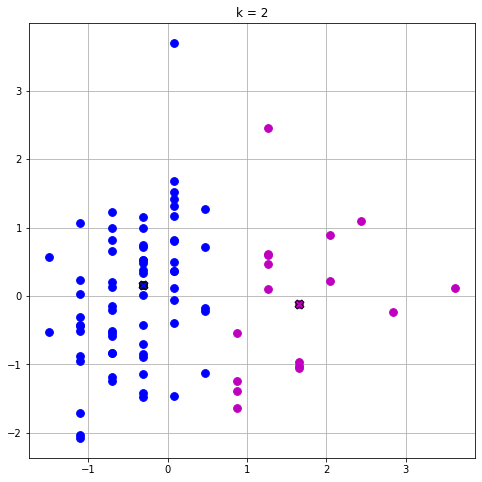

Центроиды:
 [[-0.7053 -0.8284]
 [-0.312   0.7206]
 [ 1.6548 -0.1167]] 
Объём кластеров: [30, 38, 19]


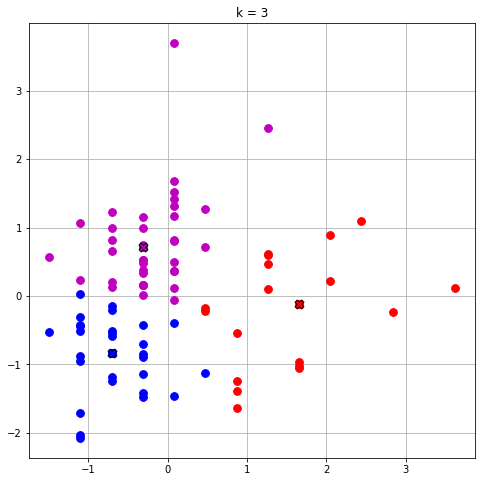

Центроиды:
 [[-0.7053 -0.8284]
 [ 1.2614  2.4543]
 [ 1.6548 -0.1167]
 [-0.312   0.5236]] 
Объём кластеров: [29, 2, 17, 39]


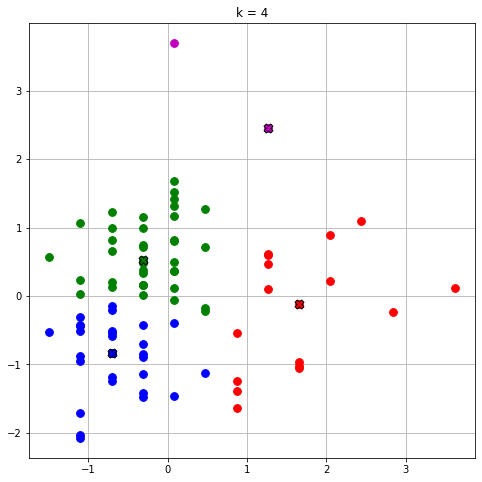

Центроиды:
 [[-0.7053 -0.8284]
 [ 1.2614  2.4543]
 [ 2.0482  0.2195]
 [ 0.8681 -0.5476]
 [-0.312   0.5236]] 
Объём кластеров: [27, 2, 9, 12, 37]


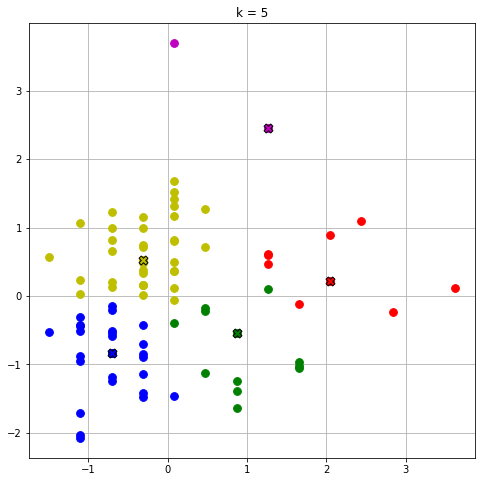

Центроиды:
 [[-0.7053 -0.8284]
 [ 1.2614  2.4543]
 [ 2.0482  0.2195]
 [ 0.8681 -1.2519]
 [ 0.0814  1.175 ]
 [-0.312   0.3291]] 
Объём кластеров: [25, 2, 10, 9, 12, 29]


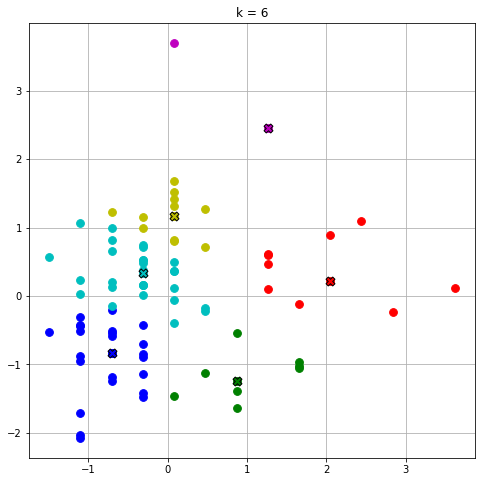

In [5]:
def k_medoids(x, y, k, centers):
    while True:
        clusters = [[] for i in range(k)]
        centers_prev = centers.copy()
        for j in range(len(x)):
            dist = [((x[j]-centers[i][0])**2 + (y[j]-centers[i][1])**2)**0.5 for i in range(k)]
            clusters[np.argmin(dist)].append([x[j],y[j]])
        for i in range(k):
            medoid = np.argmin([np.mean([((clusters[i][a][0]-clusters[i][b][0])**2+(clusters[i][a][1]-clusters[i][b][1])**2)**0.5 for a in range(len(clusters[i]))]) for b in range(len(clusters[i]))])
            centers[i] = (clusters[i][medoid][0], clusters[i][medoid][1])
        if centers_prev == centers:
            break
    return centers, clusters
for k in range(1, k_+1):
    centers, clusters = k_medoids(age, weight, k, C[k-1])
    output(centers, clusters)

#### 5. Для каждого метода заполнить таблицу, где значения $k$ изменяются от 1 до $\tilde k$.

|            |                                                       k-means                                                      |                                     |
|:----------:|:------------------------------------------------------------------------------------------------------------------------------:|:-----------------------------------:|
| Значение k |                                                  Центроиды кластера $x_{C_i}$                                                  |        Объём кластера $\#C_i$       |
|      1     |                                                             (0, 0)                                                             |                  87                 |
|      2     |                                              (-0.426, 0.0244)<br/>(1.633, -0.0936)                                             |              69<br/>18              |
|      3     |                                 (-0.6791, -0.8612)<br/>(-0.2292, 0.7996)<br/>(1.5306, -0.2395)                                 |           30<br/>38<br/>19          |
|      4     |                       (-0.5209, -0.9421)<br/>(0.6714, 3.0792)<br/>(1.8234, 0.0102)<br/>(-0.2615, 0.6114)                       |        32<br/>2<br/>14<br/>39       |
|      5     |             (-0.7189, -0.8517)<br/>(0.6714, 3.0792)<br/>(2.5989, 0.4162)<br/>(1.1041, -0.5178)<br/>(-0.2792, 0.673)            |     29<br/>2<br/>5<br/>15<br/>36    |
|      6     | (-0.7395, -1.0101)<br/>(0.6714, 3.0792)<br/>(2.5989, 0.4162)<br/>(1.0799, -0.6899)<br/>(0.1228, 0.9456)<br/>(-0.548, 0.2399) | 23<br/>2<br/>5<br/>13<br/>19<br/>25 |

|            |                                                          k-medoids                                                          |                                     |
|:----------:|:---------------------------------------------------------------------------------------------------------------------------:|:-----------------------------------:|
| Значение k |                                                 Центроиды кластера $x_{C_i}$                                                |        Объём кластера $\#C_i$       |
|      1     |                                                       (-0.312, 0.1579)                                                      |                  87                 |
|      2     |                                            (-0.312, 0.1579)<br/>(1.6548, -0.1167)                                           |              69<br/>18              |
|      3     |                                (-0.7053, -0.8284)<br/>(-0.312, 0.7206)<br/>(1.6548, -0.1167)                                |           30<br/>38<br/>19          |
|      4     |                      (-0.7053, -0.8284)<br/>(1.2614, 2.4543)<br/>(1.6548, -0.1167)<br/>(-0.312, 0.5236)                     |        29<br/>2<br/>17<br/>39       |
|      5     |           (-0.7053, -0.8284)<br/>(1.2614, 2.4543)<br/>(2.0482, 0.2195)<br/>(0.8681, -0.5476)<br/>(-0.312, 0.5236)           |     27<br/>2<br/>9<br/>12<br/>37    |
|      6     | (-0.7053, -0.8284)<br/>(1.2614, 2.4543)<br/>(2.0482, 0.2195)<br/>(0.8681, -1.2519)<br/>(0.0814, 1.175)<br/>(-0.312, 0.3291) | 25<br/>2<br/>10<br/>9<br/>12<br/>29 |

#### 6. С помощью метода локтя выявить для каждого метода оптимальное количество кластеров.

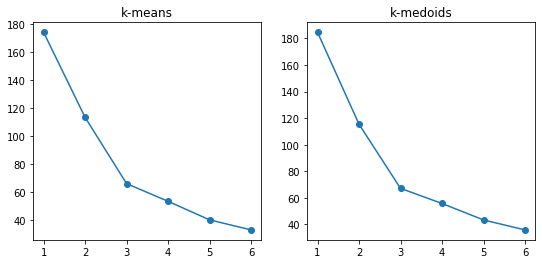

In [6]:
x = []
y = []
y2 = []
for k in range(k_):
    x.append(k+1)
    centers, clusters = k_means(age, weight, k+1, C[k])
    y.append(sum([sum([(centers[j][0]-i[0])**2+(centers[j][1]-i[1])**2 for i in clusters[j]]) for j in range(len(clusters))]))
    centers, clusters = k_medoids(age, weight, k+1, C[k])
    y2.append(sum([sum([(centers[j][0]-i[0])**2+(centers[j][1]-i[1])**2 for i in clusters[j]]) for j in range(len(clusters))]))
fig, ax = plt.subplots(1,2,figsize=(9, 4))
ax[0].plot(x, y, marker='o')
ax[1].plot(x, y2, marker='o')
ax[0].set_title('k-means')
ax[1].set_title('k-medoids')
plt.show()

По графикам видно, что оптимальное количество кластеров для обоих алгоритмов на данном множестве точек − 3.

#### 7. Реализовать алгоритм поиска сгущений при различных радиусах $R$, отобразить полученные кластеры, выделить каждый кластер разным цветом или маркером, отметить центроиды. Результаты представить в виде таблицы.

Находим промежуток $R_{min}\leq R\leq R_{max}.$

In [7]:
def forel(x, y, R):
    centers = []
    clusters = []
    u = [[x[i], y[i]] for i in range(n)]
    while True:
        xc = u[0]
        while True:
            K = [u[i] for i in range(len(u)) if ((xc[0]-u[i][0])**2 + (xc[1]-u[i][1])**2)**0.5 <= R]
            xc_ = [sum(np.array(K)[:,0])/len(K), sum(np.array(K)[:,1])/len(K)]
            if xc == xc_:
                break
            xc = xc_.copy()
        u = [i for i in u if i not in K]
        centers.append(xc)
        clusters.append(K)
        if len(u) == 0:
            return centers,clusters
D = [[((age[i]-age[j])**2 + (weight[i]-weight[j])**2)**0.5 if i > j else 0 for i in range(n)] for j in range(n)]
Rmin = min([i for j in D for i in j if i > 0])
Rmax = max([i for j in D for i in j])
print('Rmin =', round(Rmin,4), '\nRmax =', round(Rmax,4))

Rmin = 0.0012 
Rmax = 5.9026


Для начала зададим $R = R_{max}$ , чтобы точно охватить все точки набора данных.

Центроиды:
 [[ 0. -0.]] 
Объём кластеров: [87]


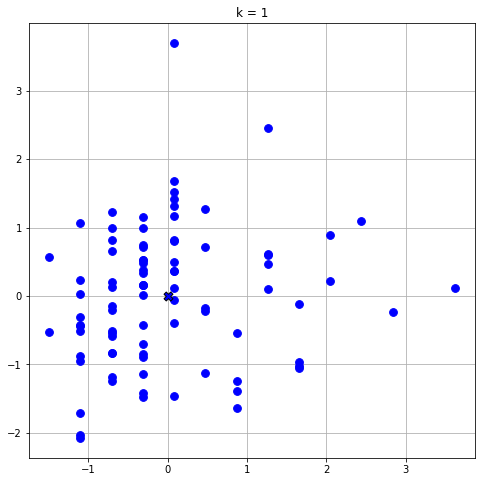

In [8]:
centers, clusters = forel(age, weight, Rmax)
output(centers, clusters)

Исходя из результатов кластеризации методами k-means и k-medoids на данном множестве точек сложно выделить кластеры с чёткими границами. Попробуем подобрать значения $R$, при которых получается наилучшее разделение на кластеры. При больших значениях $R$ результат практически не различается, а при очень маленьких $R$ множество точек разбивается на множество кластеров с 1-2 точками, поэтому такие значения рассматривать не будем.

R = 1.7189
Центроиды:
 [[-0.2895  0.0719]
 [ 0.6714  3.0792]
 [ 2.1793 -0.1198]
 [ 0.8681 -1.4276]
 [-1.0987 -1.9423]] 
Объём кластеров: [70, 2, 9, 3, 3]


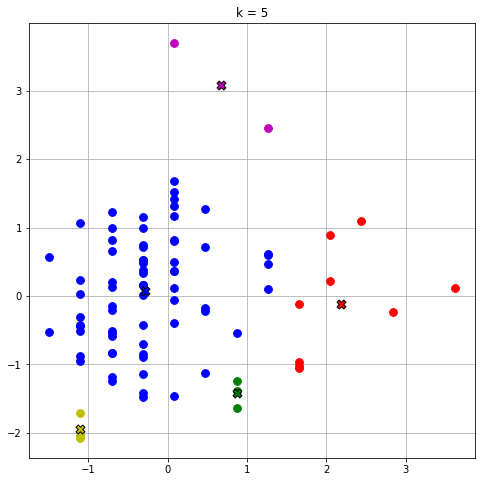

R = 1.2891
Центроиды:
 [[-0.4908  0.0167]
 [ 1.2614  2.4543]
 [ 0.1469  1.3964]
 [ 1.5118 -0.0758]
 [ 2.4415  1.0962]
 [ 0.3624 -1.3962]
 [-1.0987 -1.9423]
 [ 0.0814  3.7041]
 [ 3.2282 -0.0594]] 
Объём кластеров: [55, 1, 6, 11, 1, 7, 3, 1, 2]


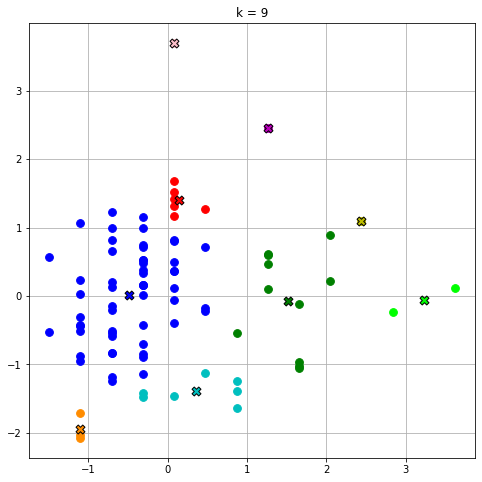

R = 0.9855
Центроиды:
 [[-0.4398 -0.0369]
 [-0.7053 -1.4177]
 [ 1.2614  2.4543]
 [-0.0396  1.1597]
 [ 1.5424  0.3938]
 [ 2.4415  1.0962]
 [ 1.1139 -1.126 ]
 [ 0.0814  3.7041]
 [-1.2954  0.8173]
 [ 3.2282 -0.0594]
 [-1.492  -0.5218]] 
Объём кластеров: [40, 11, 1, 13, 7, 1, 8, 1, 2, 2, 1]


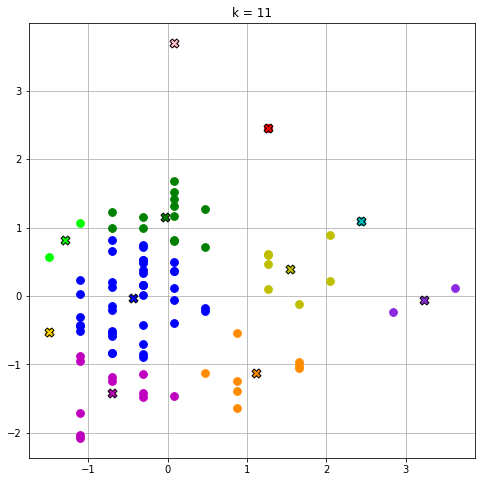

R = 0.8939
Центроиды:
 [[-0.6243 -0.373 ]
 [-0.1409  0.9024]
 [ 1.0648  0.0868]
 [ 1.2614  2.4543]
 [ 2.1793  0.7333]
 [ 1.1491 -1.2087]
 [-0.784  -1.7437]
 [ 0.0814  3.7041]
 [ 0.0814 -1.4637]
 [-1.2954  0.8173]
 [ 3.2282 -0.0594]] 
Объём кластеров: [34, 23, 8, 1, 3, 7, 5, 1, 1, 2, 2]


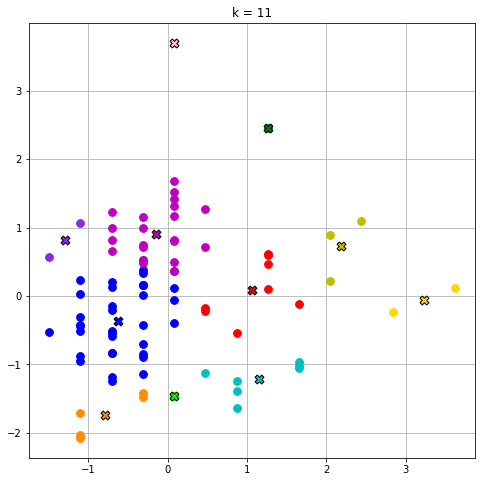

In [9]:
R = [Rmax, ((age[61]-age[4])**2 + (weight[61]-weight[4])**2)**0.5,
    ((age[76]-age[85])**2 + (weight[76]-weight[82])**2)**0.5,
    ((age[1]-age[56])**2 + (weight[1]-weight[82])**2)**0.5,
    ((age[77]-age[86])**2 + (weight[77]-weight[82])**2)**0.5]
for i in range(1, len(R)):
    centers, clusters = forel(age, weight, R[i])
    print('R =', round(R[i],4))
    output(centers, clusters)

|            |                                                                                                               Алгоритм FOREL                                                                                                               |                                                                  |
|:----------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|:----------------------------------------------------------------:|
| Значение R |                                                                                                        Центроиды кластера $x_{C_i}$                                                                                                        |                      Объём кластера $\#C_i$                      |
|   5.9026   |                                                                                                                   (0, 0)                                                                                                                   |                                87                                |
|   1.7189   |                                                                  (-0.2895, 0.0719)<br/>(0.6714, 3.0792)<br/>(2.1793, -0.1198)<br/>(0.8681, -1.4276)<br/>(-1.0987, -1.9423)                                                                 |                    70<br/>2<br/>9<br/>3<br/>3                    |
|   1.2891   |                       (-0.4908, 0.0167)<br/>(1.2614, 2.4543)<br/>(0.1469, 1.3964)<br/>(1.5118, -0.0758)<br/>(2.4415, 1.0962)<br/>(0.3624, -1.3962)<br/>(-1.0987, -1.9423)<br/>(0.0814, 3.7041)<br/>(3.2282, -0.0594)                       |        55<br/>1<br/>6<br/>11<br/>1<br/>7<br/>3<br/>1<br/>2       |
|   0.9855   | (-0.4398, -0.0369)<br/>(-0.7053, -1.4177)<br/>(1.2614, 2.4543)<br/>(-0.0396, 1.1597)<br/>(1.5424, 0.3938)<br/>(2.4415, 1.0962)<br/>(1.1139, -1.126)<br/>(0.0814, 3.7041)<br/>(-1.2954, 0.8173)<br/>(3.2282, -0.0594)<br/>(-1.492, -0.5218) | 40<br/>11<br/>1<br/>13<br/>7<br/>1<br/>8<br/>1<br/>2<br/>2<br/>1 |
|   0.8939   |  (-0.6243, -0.373)<br/>(-0.1409, 0.9024)<br/>(1.0648, 0.0868)<br/>(1.2614, 2.4543)<br/>(2.1793, 0.7333)<br/>(1.1491, -1.2087)<br/>(-0.784, -1.7437)<br/>(0.0814, 3.7041)<br/>(0.0814, -1.4637)<br/>(-1.2954, 0.8173)<br/>(3.2282, -0.0594) |  34<br/>23<br/>8<br/>1<br/>3<br/>7<br/>5<br/>1<br/>1<br/>2<br/>2 |

#### 8. Проверить чувствительность метода поиска сгущений к погрешностям. Сделать выводы.

Добавим к R из предыдущего пункта небольшое значение $\varepsilon = 0.001$ и пересчитаем кластеры.

R = 5.9036
Центроиды:
 [[ 0. -0.]] 
Объём кластеров: [87]


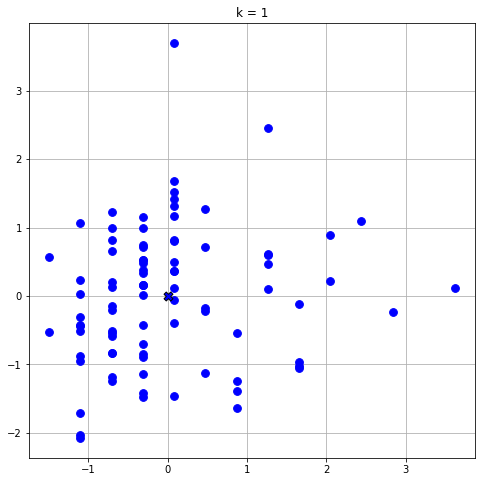

R = 1.7199
Центроиды:
 [[-0.2895  0.0719]
 [ 0.6714  3.0792]
 [ 2.1793 -0.1198]
 [ 0.8681 -1.4276]
 [-1.0987 -1.9423]] 
Объём кластеров: [70, 2, 9, 3, 3]


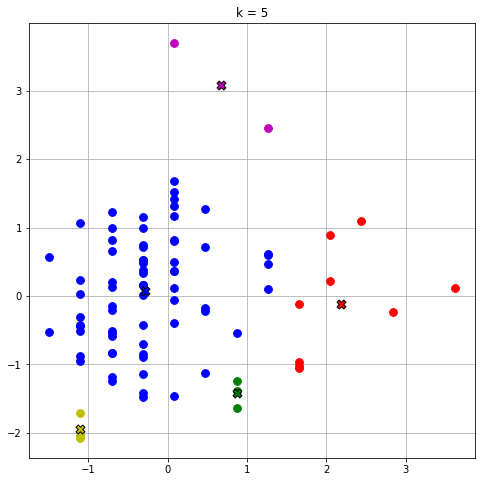

R = 1.2901
Центроиды:
 [[-0.4908  0.0167]
 [ 1.2614  2.4543]
 [ 0.1469  1.3964]
 [ 1.5118 -0.0758]
 [ 2.4415  1.0962]
 [ 0.3624 -1.3962]
 [-1.0987 -1.9423]
 [ 0.0814  3.7041]
 [ 3.2282 -0.0594]] 
Объём кластеров: [55, 1, 6, 11, 1, 7, 3, 1, 2]


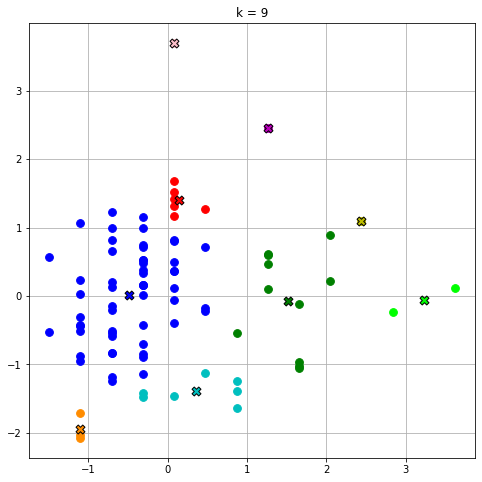

R = 0.9865
Центроиды:
 [[-0.4398 -0.0369]
 [-0.7053 -1.4177]
 [ 1.2614  2.4543]
 [-0.0396  1.1597]
 [ 1.5424  0.3938]
 [ 2.4415  1.0962]
 [ 1.1139 -1.126 ]
 [ 0.0814  3.7041]
 [-1.2954  0.8173]
 [ 3.2282 -0.0594]
 [-1.492  -0.5218]] 
Объём кластеров: [40, 11, 1, 13, 7, 1, 8, 1, 2, 2, 1]


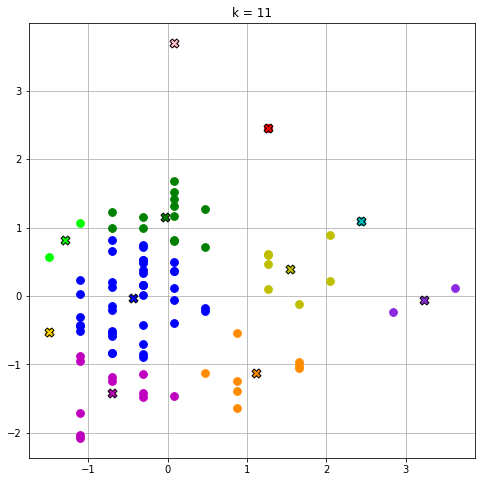

R = 0.8949
Центроиды:
 [[-0.6243 -0.373 ]
 [-0.1409  0.9024]
 [ 1.0648  0.0868]
 [ 1.2614  2.4543]
 [ 2.1793  0.7333]
 [ 1.1491 -1.2087]
 [-0.784  -1.7437]
 [ 0.0814  3.7041]
 [ 0.0814 -1.4637]
 [-1.2954  0.8173]
 [ 3.2282 -0.0594]] 
Объём кластеров: [34, 23, 8, 1, 3, 7, 5, 1, 1, 2, 2]


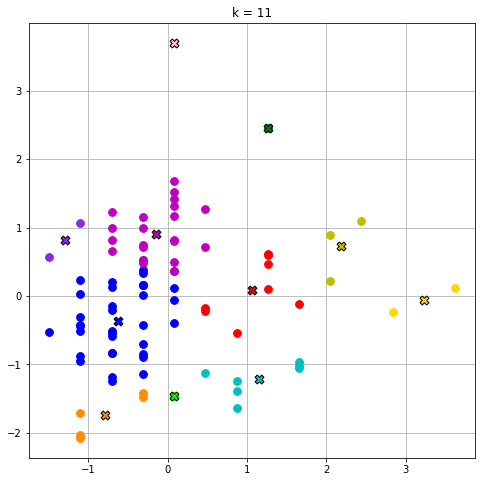

In [10]:
R = np.array(R) + 0.001
for i in range(0, len(R)):
    centers, clusters = forel(age, weight, R[i])
    print('R =', round(R[i],4))
    output(centers, clusters)

Для $R=R_{max}$ , ничего не поменялось, так как мы уже взяли максимальное значение радиуса. Для остальных значений $R$ также ничего не изменилось, значит принимаем то, что алгоритм нечувствителен к погрешностям.

#### 9. Сравнить методы. Сделать выводы.

Исходя из результатов метода локтя оптимальное количество кластеров для k-means и k-medoids равно 3. При этом разделение на кластеры почти не отличается.

Для алгоритма поиска сгущений сложно удачно подобрать значение $R$, так как на данном множестве точек проблематично выделить кластеры с чёткими границами.

Таким образом для данной выборки лучше использовать k-means или k-medoids.

#### 10*. Реализовать модификацию k-means++. Объяснить её приемущества. Сравнить с обычным методом k-means.

Выбор центроидов в методе k-means++ не случаен, что дожно приводить к лучшим результатам. Для получения хорошей кластеризации в k-means может потребоваться несколько инициализаций, так как центроиды выбираются случайно, для k-means++ достаточно одной инициализации.

Центроиды:
 [[ 0. -0.]] 
Объём кластеров: [87]


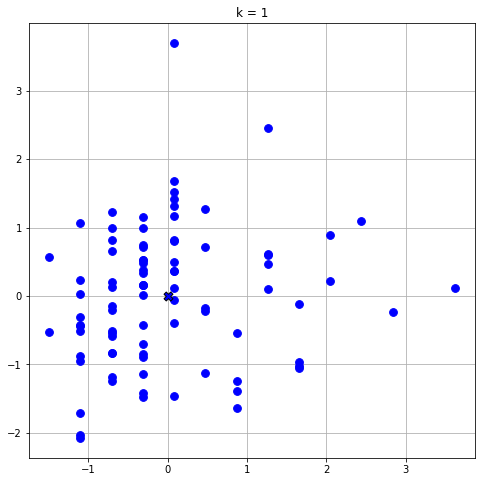

Центроиды:
 [[ 0.4142  0.8348]
 [-0.3366 -0.6783]] 
Объём кластеров: [39, 48]


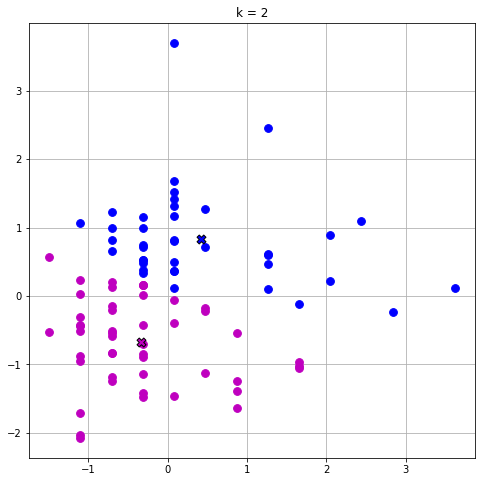

Центроиды:
 [[-0.2292  0.7996]
 [-0.4806 -0.8722]
 [ 1.8234  0.0102]] 
Объём кластеров: [38, 35, 14]


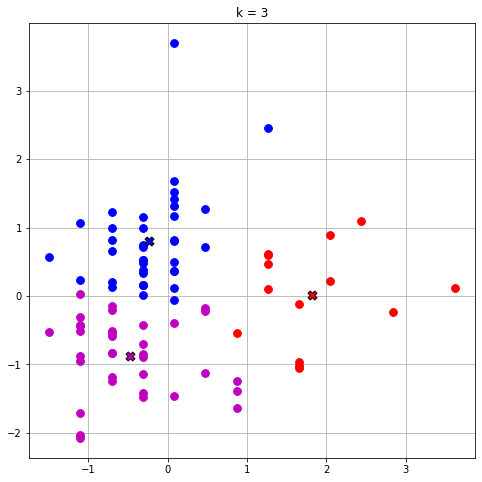

Центроиды:
 [[ 0.6714  3.0792]
 [-0.5209 -0.9421]
 [ 1.8234  0.0102]
 [-0.2615  0.6114]] 
Объём кластеров: [2, 32, 14, 39]


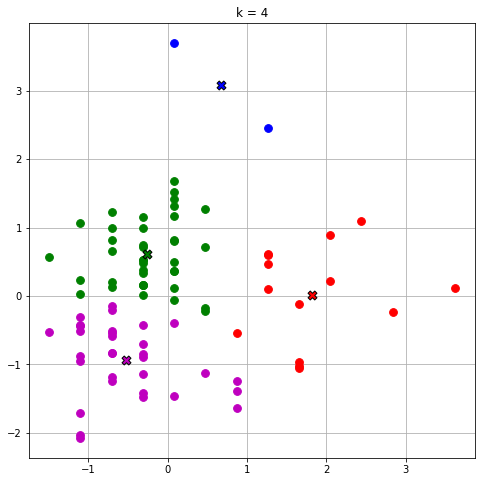

Центроиды:
 [[ 0.6714  3.0792]
 [-0.7189 -0.8517]
 [ 1.9695  0.3734]
 [-0.2792  0.673 ]
 [ 0.9861 -0.9419]] 
Объём кластеров: [2, 29, 10, 36, 10]


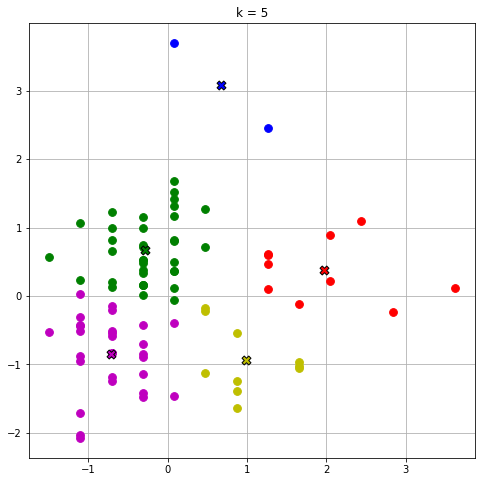

Центроиды:
 [[ 0.6714  3.0792]
 [-0.6316 -1.2309]
 [ 2.5989  0.4162]
 [-0.1809  0.8394]
 [ 1.1041 -0.5178]
 [-0.7232 -0.1565]] 
Объём кластеров: [2, 16, 5, 27, 15, 22]


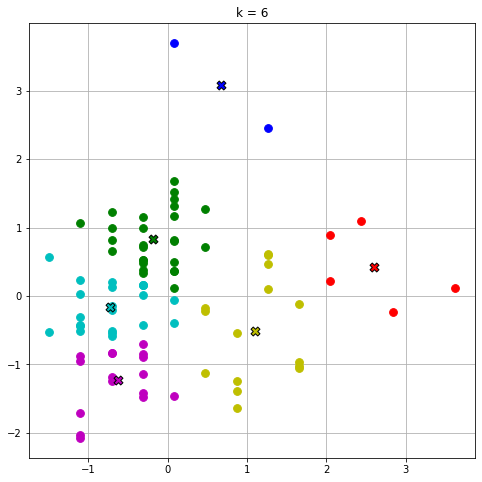

In [11]:
C = [61]
for k in range(1, k_+1):
    centers, clusters = k_means(age, weight, k, [[age[i], weight[i]] for i in C])
    output(centers, clusters)
    d = [min([((age[j]-age[C[i]])**2 + (weight[j]-weight[C[i]])**2)**0.5 if j not in C else 0 for i in range(len(C))])for j in range(n)]
    d = d/sum(np.array(d)**2)
    C.append(np.argmax(d))

По сравнению с обычным k-means k-means++ точки более логично распределены по кластерам. Например для $k=6$, при использовании метода k-means++ образуется меньше точек, которые граничат с одним кластером, но относятся к другому.

## Выводы
Найдена «грубая» верхняя оценка количества кластеров $\tilde k = 6$.

Реализованы методы кластерного анализа k-means, k-medoids, метод поиска сгущений и метод локтя. 

Методом локтя найдено оптимальное количество кластеров для k-means и k-medoids на данном множестве точек − 3.

Проверена нечувствительность метода поиска сгущений к погрешностям.

Проведено сравнение k-means, k-medoids и метода поиска сгущений. Для k-means и k-medoids разделение на кластеры почти не отличается. Для алгоритма поиска сгущений сложно удачно подобрать значение  𝑅 , поэтому для данной выборки лучше использовать k-means или k-medoids.

Проведено сравнение k-means и k-means++. В k-means++ точки более логично распределены по кластерам.